In [2]:
pip install yfinance

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [4]:
stocks= yf.download("AAPL")
stocks

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600
...,...,...,...,...,...,...
2022-09-27,152.740005,154.720001,149.949997,151.759995,151.759995,84442700
2022-09-28,147.639999,150.639999,144.839996,149.839996,149.839996,146691400
2022-09-29,146.100006,146.720001,140.679993,142.479996,142.479996,128138200


In [11]:
stocks = stocks.loc['2017-01-01':'2022-02-01']
stocks

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.219833,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.189365,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.327635,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.632286,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.885387,134247600
...,...,...,...,...,...,...
2022-01-26,163.500000,164.389999,157.820007,159.690002,159.031906,108275300
2022-01-27,162.449997,163.839996,158.279999,159.220001,158.563843,121954600
2022-01-28,165.710007,170.350006,162.800003,170.330002,169.628082,179935700


In [12]:
df = stocks[["Close"]]
df

,Close
Date,
2017-01-03,29.037500
2017-01-04,29.004999
2017-01-05,29.152500
2017-01-06,29.477501
2017-01-09,29.747499
...,...
2022-01-26,159.690002
2022-01-27,159.220001
2022-01-28,170.330002


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

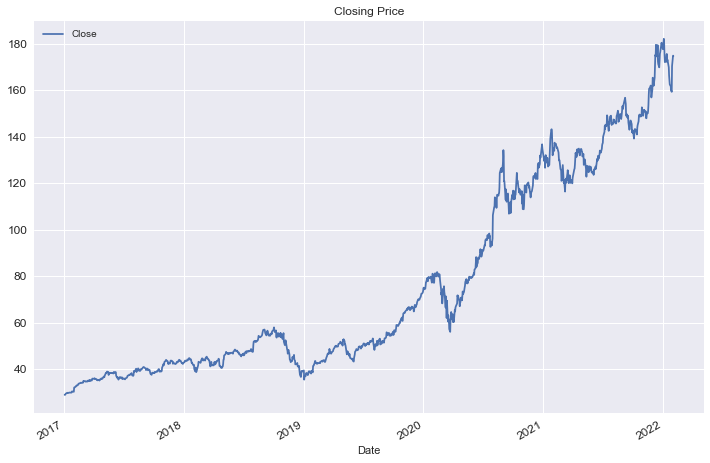

In [13]:
df.plot(figsize=(12,8),title="Closing Price",fontsize=12)

In [14]:
 period_high=20
 df["highest"]=df["Close"].rolling(window=period_high).max().shift()

/var/folders/5_/q4stfhx95cb0n8m8bxlc_5280000gn/T/ipykernel_67187/1714975170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["highest"]=df["Close"].rolling(window=period_high).max().shift()


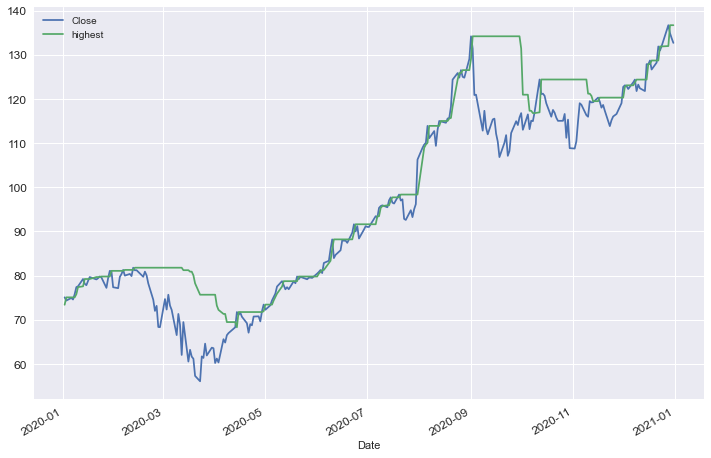

In [15]:
df.loc["2020"].plot(figsize=(12,8), fontsize =12)
plt.show()

In [16]:
df['Buy']=np.where(df["Close"].shift()>df["highest"].shift(),1,0)

/var/folders/5_/q4stfhx95cb0n8m8bxlc_5280000gn/T/ipykernel_67187/1790207673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Buy']=np.where(df["Close"].shift()>df["highest"].shift(),1,0)


In [17]:
period_low=40
df["lowest"]=df["Close"].rolling(window=period_low).min().shift()

/var/folders/5_/q4stfhx95cb0n8m8bxlc_5280000gn/T/ipykernel_67187/2096643598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lowest"]=df["Close"].rolling(window=period_low).min().shift()


In [18]:
df

,Close,highest,Buy,lowest
Date,,,,
2017-01-03,29.037500,NaN,0,NaN
2017-01-04,29.004999,NaN,0,NaN
2017-01-05,29.152500,NaN,0,NaN
2017-01-06,29.477501,NaN,0,NaN
2017-01-09,29.747499,NaN,0,NaN
...,...,...,...,...
2022-01-26,159.690002,182.009995,0,159.779999
2022-01-27,159.220001,182.009995,0,159.690002
2022-01-28,170.330002,182.009995,0,159.220001


In [19]:

df['Sell']=np.where(df["Close"].shift()<df["lowest"].shift(),1,0)

/var/folders/5_/q4stfhx95cb0n8m8bxlc_5280000gn/T/ipykernel_67187/1207604381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sell']=np.where(df["Close"].shift()<df["lowest"].shift(),1,0)


In [20]:
df

,Close,highest,Buy,lowest,Sell
Date,,,,,
2017-01-03,29.037500,NaN,0,NaN,0
2017-01-04,29.004999,NaN,0,NaN,0
2017-01-05,29.152500,NaN,0,NaN,0
2017-01-06,29.477501,NaN,0,NaN,0
2017-01-09,29.747499,NaN,0,NaN,0
...,...,...,...,...,...
2022-01-26,159.690002,182.009995,0,159.779999,0
2022-01-27,159.220001,182.009995,0,159.690002,1
2022-01-28,170.330002,182.009995,0,159.220001,1


In [21]:
df_trades=df[(df.Buy==1)|(df.Sell==1)]
df_trades

,Close,highest,Buy,lowest,Sell
Date,,,,,
2017-02-02,32.132500,32.187500,1,NaN,0
2017-02-06,32.572498,32.270000,1,NaN,0
2017-02-07,32.882500,32.572498,1,NaN,0
2017-02-08,33.009998,32.882500,1,NaN,0
2017-02-09,33.105000,33.009998,1,NaN,0
...,...,...,...,...,...
2021-12-13,175.740005,179.449997,1,144.839996,0
2021-12-28,179.289993,180.330002,1,147.869995,0
2022-01-04,179.699997,182.009995,1,147.869995,0


In [22]:
trade = df_trades[(df_trades.Buy.diff()==1)|(df_trades.Sell.diff()==1)]
trade

,Close,highest,Buy,lowest,Sell
Date,,,,,
2018-01-30,41.742500,44.814999,0,41.990002,1
2018-02-26,44.742500,43.875000,1,38.787498,0
2018-04-25,40.912498,44.560001,0,40.735001,1
2018-05-07,46.290001,45.957500,1,40.580002,0
2018-10-30,53.325001,58.017502,0,53.060001,1
2019-01-31,41.610001,41.312500,1,35.547501,0
2019-05-14,47.165001,52.937500,0,46.430000,1
2019-06-12,48.547501,48.702499,1,43.325001,0
2020-02-26,73.162498,81.800003,0,72.019997,1


In [23]:
df

,Close,highest,Buy,lowest,Sell
Date,,,,,
2017-01-03,29.037500,NaN,0,NaN,0
2017-01-04,29.004999,NaN,0,NaN,0
2017-01-05,29.152500,NaN,0,NaN,0
2017-01-06,29.477501,NaN,0,NaN,0
2017-01-09,29.747499,NaN,0,NaN,0
...,...,...,...,...,...
2022-01-26,159.690002,182.009995,0,159.779999,0
2022-01-27,159.220001,182.009995,0,159.690002,1
2022-01-28,170.330002,182.009995,0,159.220001,1


In [24]:
Buy_dates=[]
Sell_dates=[]
buys = []
sells = []
open_pos=False

In [25]:
Buy_dates=[]
Sell_dates=[]
buys = []
sells = []
open_pos=False
for i in range(len(df)):
    if df.Buy.iloc[i]:
        if open_pos == False:
            buys.append(i)
            open_pos=True
            Buy_dates.append(df.iloc[i].name)
    elif df.Sell.iloc[i]:
        if open_pos:
            sells.append(i)
            open_pos=False
            Sell_dates.append(df.iloc[i].name)

In [26]:
print(len(buys))
print(len(sells))

8
8


In [27]:
if len(buys)>len(sells):
    buys.pop(-1)
    Buy_dates.pop(-1)

In [28]:
print(len(buys))
print(len(sells))

8
8


In [29]:
check=pd.DataFrame({'buydate':Buy_dates,'selldate': Sell_dates,'buyprice':df.loc[Buy_dates].Close.values,'sellprice':df.loc[Sell_dates].Close.values})

In [30]:
check

,buydate,selldate,buyprice,sellprice
0,2017-02-02,2018-01-30,32.132500,41.742500
1,2018-02-26,2018-04-25,44.742500,40.912498
2,2018-05-07,2018-10-30,46.290001,53.325001
3,2019-01-31,2019-05-14,41.610001,47.165001
4,2019-06-12,2020-02-26,48.547501,73.162498
5,2020-04-15,2021-02-23,71.107498,125.860001
6,2021-04-06,2021-09-21,126.209999,143.429993
7,2021-10-20,2022-01-27,149.259995,159.220001


In [31]:
check["pnl_perc"] = (check.sellprice-check.buyprice)/check.buyprice
check

,buydate,selldate,buyprice,sellprice,pnl_perc
0,2017-02-02,2018-01-30,32.132500,41.742500,0.299074
1,2018-02-26,2018-04-25,44.742500,40.912498,-0.085601
2,2018-05-07,2018-10-30,46.290001,53.325001,0.151977
3,2019-01-31,2019-05-14,41.610001,47.165001,0.133502
4,2019-06-12,2020-02-26,48.547501,73.162498,0.507029
5,2020-04-15,2021-02-23,71.107498,125.860001,0.769996
6,2021-04-06,2021-09-21,126.209999,143.429993,0.136439
7,2021-10-20,2022-01-27,149.259995,159.220001,0.066729


In [32]:
check["cumm+pnl_perc"]=(check["pnl_perc"]+1).cumprod()
check

,buydate,selldate,buyprice,sellprice,pnl_perc,cumm+pnl_perc
0,2017-02-02,2018-01-30,32.132500,41.742500,0.299074,1.299074
1,2018-02-26,2018-04-25,44.742500,40.912498,-0.085601,1.187872
2,2018-05-07,2018-10-30,46.290001,53.325001,0.151977,1.368401
3,2019-01-31,2019-05-14,41.610001,47.165001,0.133502,1.551085
4,2019-06-12,2020-02-26,48.547501,73.162498,0.507029,2.337530
5,2020-04-15,2021-02-23,71.107498,125.860001,0.769996,4.137419
6,2021-04-06,2021-09-21,126.209999,143.429993,0.136439,4.701925
7,2021-10-20,2022-01-27,149.259995,159.220001,0.066729,5.015681


In [33]:
totaltrades=len(check.pnl_perc)
totaltrades

8

In [34]:
profits=df.loc[check.selldate].Close.values-df.loc[check.buydate].Close.values
profits

array([ 9.61000061, -3.83000183,  7.03499985,  5.55500031, 24.61499786,
       54.75250244, 17.21999359,  9.96000671])

In [35]:
i=0
profit_trades = len([i for i in profits if i>0])
profit_trades_perc=(profit_trades/totaltrades)*100

In [36]:
print(profit_trades)
print("win ratio = {}".format(profit_trades_perc))

7
win ratio = 87.5


In [37]:
profits_perc=(df.loc[check.selldate].Close.values-df.loc[check.buydate].Close.values)/df.loc[check.buydate].Close.values

In [38]:
avg_profit = profits_perc.mean()*100
avg_profit

24.739315205582788

In [39]:

list_profits = (profits_perc+1).cumprod()
list_profits

array([1.29907417, 1.18787215, 1.36840099, 1.55108467, 2.33752981,
       4.13741885, 4.70192504, 5.01568094])

In [40]:

net_returns_perc=(list_profits[-1]-1)*100
net_returns_perc


401.5680944225004

In [47]:
profits_perc.min()

-0.5678080737980564

In [48]:
profits_perc.max()

2.2005457836063194

In [49]:
init_inv=1000
inv_ret = init_inv*(profits_perc+1).cumprod()
inv_ret[-1]

2010860.6546275103

In [18]:
def test_strategy(stock, buy_days, sell_days,invest):
    data=yf.download(stock)
    data=data.loc['2018-01-01':'2022-10-12']
    df=data.Close.to_frame()
    df["highest"]=(df["Close"].rolling(window=buy_days).max()).shift()
    df["Buy"]=np.where(df["Close"].shift()>df["highest"].shift(),1,0)
    df["lowest"]=(df["Close"].rolling(window=sell_days).min()).shift()
    df["Sell"]=np.where(df["Close"].shift()<df["lowest"].shift(),1,0)
    
    Buy_dates=[]
    Sell_dates=[]
    buys=[]
    sells=[]
    open_pos=False
    
    for i in range(len(df)):
        if df.Buy.iloc[i]:
            if open_pos==False:
                buys.append(i)
                open_pos=True
                Buy_dates.append(df.iloc[i].name)
        elif df.Sell.iloc[i]:
            if open_pos:
                sells.append(i)
                open_pos=False
                Sell_dates.append(df.iloc[i].name)
    
    if len(buys)>len(sells):
        buys.pop(-1)
        Buy_dates.pop(-1)
    
    check=pd.DataFrame({'buydate':Buy_dates,'selldate':Sell_dates,'buyprice':df.loc[Buy_dates].Close.values,'sellprice':df.loc[Sell_dates].Close.values})
    check["pnl_perc"]=(check.sellprice-check.buyprice)/check.buyprice
    check["cumm+pnl_perc"]=(check["pnl_perc"]+1).cumprod()
    
    profits_perc=(df.loc[check.selldate].Close.values-df.loc[check.buydate].Close.values)/df.loc[check.buydate].Close.values
    list_profits=(profits_perc+1).cumprod()
    net_returns_perc=(list_profits[-1]-1).round(3)*100
    
    inv_ret=invest*(profits_perc+1).cumprod()
    return_inv=inv_ret[-1]
    
    large_loss=profits_perc.min().round(3)*100
    large_profit=profits_perc.max().round(3)*100   
    
    return print("Returns perc= {}%".format(net_returns_perc)), print("Invested return= {}".format(return_inv)), print("Largest Loss= {}%".format(large_loss)), print("Largest Profit= {}%".format(large_profit))

In [19]:
test_strategy("^GSPC", 20, 40, 10000)

[*********************100%***********************]  1 of 1 completed
Returns perc= 44.7%
Invested return= 14466.767794850206
Largest Loss= -6.9%
Largest Profit= 56.10000000000001%


(None, None, None, None)